In [1]:
from ds_utils.imports import *

Using Theano backend.


In [133]:
data = pd.read_csv(
    'data/international-airline-passengers.csv', engine='python', skipfooter=3)

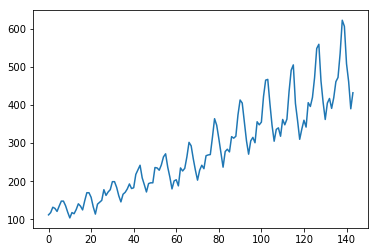

In [134]:
plt.plot(data.iloc[:, 1])

In [135]:
np.random.seed(7)

In [169]:
ts = data.iloc[:, 1].astype('float').values.reshape(-1, 1)

In [170]:
ts.shape

(144, 1)

In [138]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
ts = scaler.fit_transform(ts)

In [139]:
train_size = int(len(ts) * 0.67)

In [140]:
ts_train = ts[:train_size]
ts_test = ts[train_size:]

In [187]:
ts_train.shape

(96, 1)

In [188]:
ts_test.shape

(48, 1)

In [142]:
look_back=1
def make_xy(ts):
    Y = ts[look_back:]
    X = ts[:-look_back]
    return X, Y

In [143]:
X_train, Y_train = make_xy(ts_train)
X_test, Y_test = make_xy(ts_test)

In [144]:
X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1)

In [145]:
X_train.shape

(95, 1, 1)

In [146]:
Y_train.shape

(95, 1)

In [147]:
model = keras.models.Sequential([
    keras.layers.LSTM(4, input_shape=(1, look_back)),
    keras.layers.Dense(1)
])

In [148]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)

In [149]:
model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_data=[X_test, Y_test])

Train on 95 samples, validate on 47 samples
Epoch 1/100
95/95 [==============================] - 0s - loss: 0.0337 - val_loss: 0.1698
Epoch 2/100
95/95 [==============================] - 0s - loss: 0.0147 - val_loss: 0.1056
Epoch 3/100
95/95 [==============================] - 0s - loss: 0.0114 - val_loss: 0.0878
Epoch 4/100
95/95 [==============================] - 0s - loss: 0.0103 - val_loss: 0.0753

In [160]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [161]:
pred_train_original_scale = scaler.inverse_transform(pred_train)
pred_test_original_scale = scaler.inverse_transform(pred_test)

In [163]:
Y_train_original_scale = scaler.inverse_transform(Y_train)
Y_test_original_scale = scaler.inverse_transform(Y_test)

In [164]:
train_rmse = np.sqrt(sklearn.metrics.mean_squared_error(Y_train_original_scale, pred_train_original_scale))
train_rmse

23.260887382515062

In [165]:
test_rmse = np.sqrt(sklearn.metrics.mean_squared_error(Y_test_original_scale, pred_test_original_scale))
test_rmse

49.020042453736671

In [166]:
pred_test.shape

(47, 1)

In [167]:
pred_train.shape

(95, 1)

In [168]:
ts.shape

(96, 1)

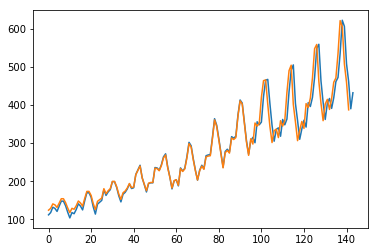

In [185]:
plt.plot(ts)
plt.plot(np.vstack([pred_train_original_scale, pred_test_original_scale]))

http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/